##### Last update: april 05 2023

# Bike Share Project - Analysis

# Table of Contents

1. [Introduction](#intro)
2. [Project Goal](#goal)
3. [Description and Limitations of the Data](#data)
4. [Analysis](#analysis)
    * [Overall Differences](#overall)
        * [Overall Insights](#overall_ins)
    * [Yearly Trends](#yearly)
        * [Yearly Insights](#yearly_ins)
    * [Weekly Trends](#weekly)
        * [Weekly Insights](#weekly_ins)
    * [Daily Trends](#daily)
        * [Daily Insights](#daily_ins)
    * [Geographical Trends](#geo)
        * [Geographical Insights](#geo_ins)
* [Key Insights](#summary)
* [Recommendations](#recommendations)


# Introduction <a name="intro"></a>

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno - director of marketing - believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

# Project Goal <a name="goal"></a>

The goal of this project is to **determine the differences between how casual users and members use the bikes** provided by this bike-sharing company, in order to come up with informed marketing strategies that **incentivize casual users to become full fledged members** of this bike sharing community. 

To make the best decisions possible the company has gathered data from all rides made on the last 12 months, and made it available under this [license agreement](https://ride.divvybikes.com/data-license-agreement). After collected, the data has already been cleaned, validated and verified. It has also been stripped beforehand from all personally identifiable information, and is in such a form that can be used effectively to make data-driven decisions regarding the purpose of this project.


# Description and Limitations of the data <a name="data"></a>

The data contains information for almost 6 million bike rides made between March 01 2022 and February 28 2023, which can be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html). It has been cleaned and transformed and contains the following information:
* **trip_id**: a unique identifier for each ride made with one of the bikes.
* **bike_type**: the type of bike that was used. The types of bikes are electric, classic and docked.
* **start_time, end_time**: the time and date the ride started/ended. It is of datetime type.
* **start_name, end_name**: the name of the station where the trip started/ended.
* **start_id, end_id**: the code that identifies the station where the trip started/ended. 
* **start_lat, start_lng, end_lat, end_lng**: the coordinates for the station where the trip started/ended. It has been rounded to 5 decimal places. 
* **usertype**: the type of user, casual or member.
* **year, month, time_of_day, date**: extracted from the start_time field.
* **duration**: time elapsed between start_time and end_time, it is of timedelta type.
* **minutes**: the duration in minutes, rounded to 1 decimal place.
* **day_of_week**: the day of the week when the trip started.
* **distance**: the approximate distance that was traveled from the start to the end of the ride. Calculated using a flat surface approximation.
* **speed**: the average speed for the whole ride, disregarding completely the route that was taken (speed=distance/minutes).

There are some quirks and limitations to the data, these following are the main ones:
* The data doesn't include any information that could allow us to determine patterns concerning individuals. For example, there could be a small group of users that use one particular station a lot, parking and taking out bikes from it several times a day. There is no way for us to know from the available data if the popularity for that station is because of this small group or if it truly is representative of the population. 
* Information about the state or country in which a user resides could also allow us to create better social media adds, targeted for specific communities, and also reducing the investment in it by avoiding regions that have next to none tourist flow towards Chicago. This information is not included in the data, though, so any kind of targeting that is more specific than just the user type is impossible without gathering additional information. 
* The data shows approximately twice as many station names and id's as there should be, even after cleaning the data. Whether this is because each station has multiple names/ids, that they changed at some point or something else would need to be clarified with the company.
* Stations' coordinates vary within a small range of values; that range is not something to worry too much about, but it is definitely not fixed to a single value, as one would expect for a non-moving object. This introduces a lot more coordinates than there should be.

During the cleaning process there have been steps taken to decrease the effect of the last two issues listed above, although further work with the company to clarify things even further is still needed. The data has also been cleaned for outliers, concerning mainly to really long duration trips, spanning even for several days, and also for trips starting or ending really far away from the area covered by the stations. These steps were taken in order to avoid skewing the analysis results by non-representative individuals. This can only take us so far though, and there could be patterns and trends that might still be skewed because of individuals not being able to get identified by the data, as was mentioned above. The dataset is so large, though, having **5,601,735 recorded bike rides** after cleaning, that it would be almost impossible for a single individual or group of individuals to skew the results in a significant way. 

In [33]:
## Imports and formatting
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## set generic figure and font size
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["font.size"] = 13

## The following code will make plots appear centered
## with the text, instead of to the left.
from IPython.core.display import HTML

In [2]:
## Hide warnings for the final version
import warnings

warnings.filterwarnings(action="ignore")

In [3]:
## Loading and preparing the data
rides = pd.read_csv("../data/cleaned/rides.csv")

# The days of week and month, althoug categorical variables, have
# a certain order to them. All analysis and visualizations made
# with them will be easier if that order is imposed early on.

# here is the order for the days
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# it is imposed to the day_of_week field
rides["day_of_week"] = rides["day_of_week"].astype(
    pd.api.types.CategoricalDtype(categories=days_order, ordered=True)
)

# now the order for the month
months = [
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
    "Jan",
    "Feb",
]

# and it is imposed to the month field
rides["month"] = rides["month"].astype(
    pd.api.types.CategoricalDtype(categories=months, ordered=True)
)

In [4]:
# Finally, having some consistency for the colors would be good as well.
# We are not really interested in users who are already members, so
# they get gray. Casual users, who we will be focusing on, get blue.
# Overall data, without any regards to user types, will be a soft
# green.
user_palette = {"casual": "dodgerblue", "member": "slategrey"}

bike_palette = {
    "electric_bike": "cornflowerblue",
    "classic_bike": "yellowgreen",
    "docked_bike": "orange",
}

# Analysis <a name="analysis"></a>

The data is already formatted in a useful way and has many useful features for analysis. With it we will go over several stages of analysis, going from overall differences to yearly, weekly, daily and geographical trends and traits that characterize casual users.

## Overall differences <a name="overall"></a>

Here we look at the differences between members and casual users over a full year of bike usage, that is, with a yearly granularity.

To begin with, the next table shows that, although there are **more trips made by members** with an annual subscription, **casual users spend more time using the bikes**, overall. This indicates casual users have longer rides, at least as it regards to their duration.

In [5]:
## creates a table showing % of all trips and total riding time by user type

# convert minutes to years.
calculation = lambda x: sum(x) / (60 * 24 * 30.5 * 12)

# calculate number of trips and total ride time
df = (
    rides.groupby("usertype")
    .agg({"usertype": "count", "minutes": calculation})
    .rename(
        columns={
            "minutes": "Total riding time (in years)",
            "usertype": "% of all trips",
        }
    )
)

# Convert number of trips to % of trips
df["% of all trips"] = df["% of all trips"] / len(rides) * 100
df

,% of all trips,Total riding time (in years)
usertype,,
casual,40.063266,77.293679
member,59.936734,75.491144


From the next chart we see that docked bikes are rarely used, while electric and classic bikes take almost 50% of the share each, with electric ones having a slight advantage.

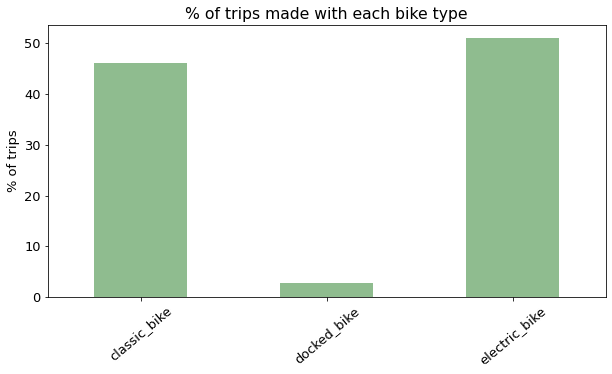

In [6]:
## barchart of % of all trips made with each bike type

# % of rides by bike type.
(rides.groupby("bike_type")["trip_id"].count() / len(rides) * 100).plot(
    kind="bar", color="darkseagreen"
)

# Plot formatting
plt.title("% of trips made with each bike type")
plt.ylabel("% of trips")
plt.xlabel("")
plt.xticks(rotation=40);

when we split the trips into those made by members and by users, though, we find that **casual users generally prefer electric bikes**, while members are almost evenly split between classic and electric.

One thing worth noting is that **members didn't use a single docked bike** in the whole year.

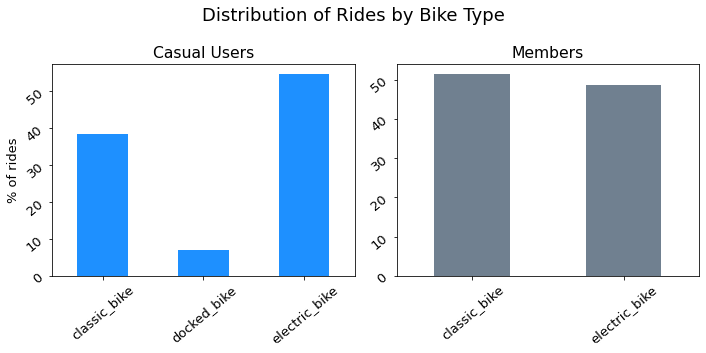

In [7]:
## barchart of % of all trips made with each bike type for each user type

fig, ax = plt.subplots(1, 2)
fig.suptitle("Distribution of Rides by Bike Type", size=18)

colors = ["dodgerblue", "slategrey"]  # to set colors for usertype

for i, bike_type in enumerate(["casual", "member"]):
    # count num or rides by bike type for casual/member users
    df = (
        rides[rides.usertype == bike_type][["bike_type", "trip_id"]]
        .groupby("bike_type")
        .count()
    )
    # calculate % of rides by casual/members made with each bike type
    df["trip_id"] = df["trip_id"] / int(df.sum()) * 100
    # plot this as a bar chart
    df.plot(ax=ax[i], kind="bar", legend=False, color=colors[i])

# plot formatting
ax[0].set_title("Casual Users")
ax[1].set_title("Members")

for i in [0, 1]:
    ax[i].tick_params(labelrotation=40)
    ax[i].set_xlabel("")

ax[0].set_ylabel("% of rides")

plt.tight_layout()

The next table shows some descriptive statistics for the trip duration.

Casual users go on rides with a longer duration than members. They have a higher standard deviation also, indicating there was a high number of casual users that had considerably longer lasting trips than average. 

In [8]:
# calculate mean, median and std for minutes by usertype
rides.groupby(["usertype"])["minutes"].agg(["mean", "median", "std"])

,mean,median,std
usertype,,,
casual,18.151756,12.7,16.492176
member,11.850153,8.9,9.877670


The following boxplot and histogram show that, indeed, **casual users tend to go on trips with a longer duration**. 
Most members keep their trips short, under 30 minutes. Beyond that duration the number of rides by casual users is greater than that of members, which is the reason why the mean gets dragged so much to the right from the median. 
Both casual's and member's distributions are skewed to the right, but casual's do so to a greater extent. 

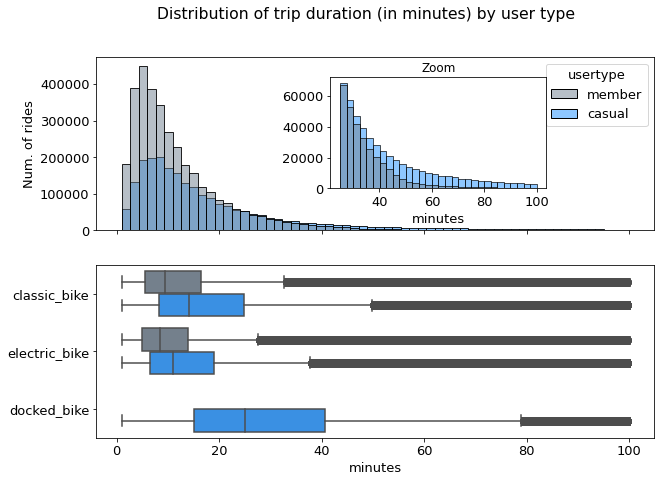

In [9]:
## Visualize distribution for duration in minutes by bike and user type

fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_figheight(7)
fig.suptitle("Distribution of trip duration (in minutes) by user type")

# histogram for trip duration in minutes
sns.histplot(
    ax=ax[0], data=rides, hue="usertype", x="minutes", bins=60, palette=user_palette
)

# add a close-up on trip longer than 25 minutes
ax2 = plt.axes([0.45, 0.62, 0.3, 0.22])
close_up = rides[(rides["minutes"] > 25) & (rides["minutes"] < 100)]
sns.histplot(
    ax=ax2,
    data=close_up,
    hue="usertype",
    x="minutes",
    bins=30,
    palette=user_palette,
    legend=False,
)

# boxplot for trip duration in minutes
sns.boxplot(
    ax=ax[1],
    data=rides,
    y="bike_type",
    x="minutes",
    palette=user_palette,
    hue="usertype",
)

# plot formatting
ax[0].set_ylabel("Num. of rides")
ax[0].set_xlabel("")

ax2.set_title("Zoom", size=12)
ax2.set_ylabel("")

ax[1].set_xlabel("minutes")
ax[1].legend().remove()
ax[1].set_ylabel("");

There is also a measurable difference between durations for different types of bikes. **Electric bikes** seem to be **used for efficient, short trips**, while **classic and - especially - docked bikes are used for longer, probably more recreational rides**.

For all types of bikes casual users have more lasting rides than members. 

The next table shows the mean duration for trips made by casual users and members for each type of bike, and it reinforces some of the insights gathered from the last plot.

Although rides with classic bikes are longer in general, the difference is a lot more drastic for casual users.

This suggests that **members use the bikes mainly as a convenient method for transportation**, having shorter ride times with electric bikes simply because they are faster, while **casual users take out classic bikes to enjoy the ride**, taking their time to go from one place to another. They do so to such extent that even using electric bikes they still have longer lasting trips than members using classic bikes.

In [10]:
# Find mean trip duration by bike and user types.
pd.pivot(
    (rides.groupby(["usertype", "bike_type"])["minutes"].mean()).reset_index(),
    values="minutes",
    index="bike_type",
    columns="usertype",
)

usertype,casual,member
bike_type,,
classic_bike,19.838146,12.654179
docked_bike,30.934823,NaN
electric_bike,15.355636,10.999165


Another factor that plays a role here is the distance traveled. Perhaps casual users not only ride more slowly, but they make longer distance trips as well?. The chart below shows this is not at all the case. Year round average trip distances are almost exactly the same for all bike and user types: around 1.9 km. 

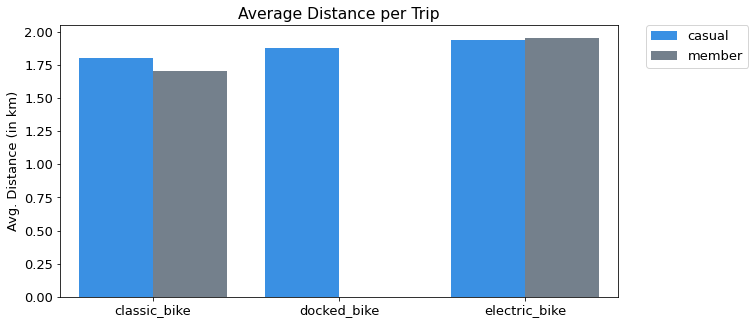

In [11]:
## plot mean distance by bike and user type

# calculate mean distance by bike and user types
df = rides.groupby(["usertype", "bike_type"])["distance"].mean().reset_index()

# plot the mean distances
sns.barplot(data=df, x="bike_type", y="distance", hue="usertype", palette=user_palette)

# plot formatting
plt.title("Average Distance per Trip")
plt.xlabel("")
plt.ylabel("Avg. Distance (in km)")

# move legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0);

A more detailed view of the distribution of trip's distance reveals that 

* Most **member's trips are very short**, between 0.5 and 2 km aprox.
* **Casual users** have a less pronounced peak for short trips; the **distances** traveled by them **are more spread out**.
* **Casual users most common trips** have close to **0 km** total distance traveled. This could either be false starts or round trips. 

Looking at the boxplots for each bike type we also notice that

* **Electric bikes** are more popular for slightly **longer routes**. 
* **Classic bikes** are **used mostly for short rides**, with the distribution for casuals a little bit more skewed toward longer trips than that of members. 
* **Docked bikes** are used pretty much for any distance, although as we've seen before they are rarely used.

In [12]:
# calculate summary statistics for distance by usertype
rides.groupby(["usertype"])["distance"].agg(["mean", "median", "std"])

,mean,median,std
usertype,,,
casual,1.881340,1.43,1.630055
member,1.825682,1.29,1.625341


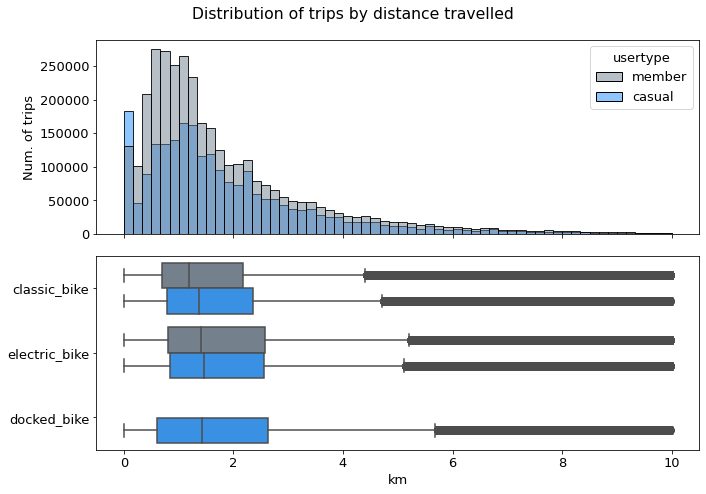

In [13]:
## Visualize distribution for distance travelled by bike and user type

fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_figheight(7)
fig.suptitle("Distribution of trips by distance travelled")

# distance histogram by user type
sns.histplot(
    ax=ax[0], data=rides, x="distance", bins=60, hue="usertype", palette=user_palette
)
ax[0].set_ylabel("Num. of trips")
ax[0].set_xlabel("")

# distance boxplot by bike and user types
sns.boxplot(
    ax=ax[1],
    data=rides,
    x="distance",
    hue="usertype",
    y="bike_type",
    palette=user_palette,
)
ax[1].legend().remove()
ax[1].set_ylabel("")
ax[1].set_xlabel("km")

plt.tight_layout();

With these results about the duration and length of the trips it is fair to guess that the speed for casual users will be less than that of members, and electric bikes will be fastest, with docked ones being the slowest. The next table and plots show just that.

Both members and casuals reach **speeds up to $\sim$18 km/h on classic bikes** and up to **$\sim$24 km/h with electric bikes**, and that is without counting the most extreme users. This goes to show that electric bikes are in fact exploited for their speed. 

With this said, it is worth noting that the 25-75% portion of the boxplot for members using classic bikes is fully contained within the 25-75% range for casuals using electric bikes, which shows that casual users, even when using electric bikes, can go really slow. 

In [14]:
# summary statistics for speed
rides.groupby(["usertype"])["speed"].agg(["mean", "median", "std"])

,mean,median,std
usertype,,,
casual,8.028882,7.92,4.909815
member,9.925001,9.67,4.554248


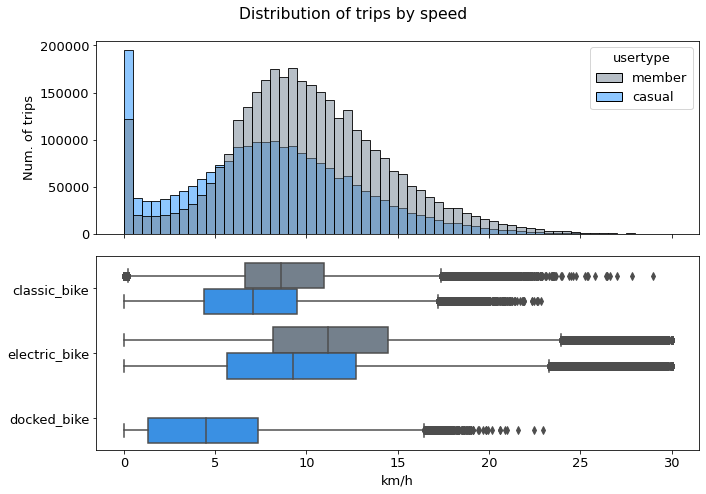

In [15]:
## Visualize distribution for speed by bike and user type

fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_figheight(7)
fig.suptitle("Distribution of trips by speed")

# speed histogram by user type
sns.histplot(
    ax=ax[0], data=rides, x="speed", bins=60, hue="usertype", palette=user_palette
)
ax[0].set_xlabel("")
ax[0].set_ylabel("Num. of trips")

# speed boxplot by bike and user types
sns.boxplot(
    ax=ax[1], data=rides, x="speed", hue="usertype", y="bike_type", palette=user_palette
)
ax[1].legend().remove()
ax[1].set_ylabel("")
ax[1].set_xlabel("km/h")

plt.tight_layout();

### Insights for overall differences <a name="overall_ins"></a>

* **Members are faster** than casual users by almost 2 km/h on average.
* **Casual users use each bike for more time**, on average, than members. Around 6 minutes more per trip, to be precise.
* **Casual users prefer electric bikes**, members don't have a clear preference.
* **Electric bikes** are used for **faster rides**. Docked bikes are used for slow rides.
* **Electric bikes** are used for **longer distance rides**
* **Docked bikes are rarely used**, and exclusively by casual users.
* **Casual users** most common trip is **false starts and/or round trips**.



## Yearly trends <a name="yearly"></a>

The next plot shows the percentage of total for trips happening each month. The green line is the sum of the other two, and shows the total of trips for each month. 

Both user types display similar trends, although the curve is more pronounced for casual users: colder months (November to march) see the least amount of rides. After April comes the number of trips steadily increases, reaching a maximum on July for casual users and august for members, and decreasing after that until reaching a valley around December and lasting for at least 3 months (up to the present date on which this analysis was made).

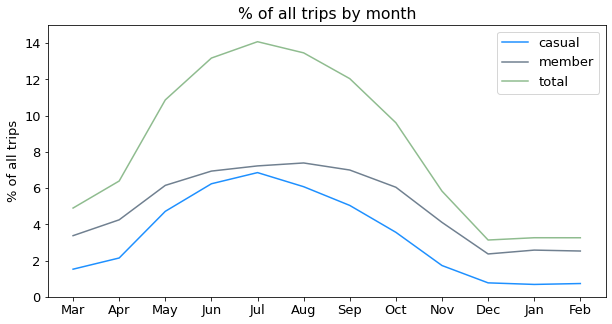

In [16]:
## visualize % of total trips by month and usertype, and monthly total

# calculate % of all trips (from all 12 months) made each month by each user type
df = (
    rides.groupby(["usertype", "month"])["trip_id"].count() / len(rides) * 100
).reset_index()

# plot the percentages
sns.lineplot(
    data=df, x="month", y="trip_id", hue="usertype", palette=user_palette, legend=False
)

# calculate % of all trips (from all 12 months) made each month disregarding user type
df2 = (rides.groupby("month")["trip_id"].count() / len(rides) * 100).reset_index()

# plot
sns.lineplot(
    data=df2,
    x="month",
    y="trip_id",
    color="darkseagreen",
    palette=user_palette,
    legend=False,
)

# plot formatting
plt.ylabel("% of all trips")
plt.ylim(0, 15)
plt.xlabel("")
plt.title("% of all trips by month")
plt.legend(["casual", "member", "total"]);

The next plot shows the percentage of trips made within each month by casual users vs members. It is clearly shown that, although the yearly trends are similar for both types of users in the sense that the monthly number of trips increases in warm months and decreases in cold ones, the share of those trips that are made by members vs casual users display opposite tendencies: casuals have only 30% of the share of monthly trips in March but they rise up to almost 50% in July, while members hold 70% of March trips and decrease to about 50% in July. The difference is even higher in January, with casuals holding only $\sim$20% and members $\sim$80%.

As for the bike types, they seem to change their popularity along the year as well. Docked bikes are the least popular and stay pretty much the same all year. Classic and electric bikes, on the other hand, have exactly opposite trends. 

Electric bikes are most popular almost all year long, especially from July to January. Classic bikes only take over for a brief period during springtime, in May and June. Perhaps this has to do with the weather being nicer for a ride in these months while, when it's cold outside, people want to get to their destination ASAP, which is more achievable using electric bikes.
This doesn't explain why classic bikes start making a comeback in January, although the drop in tourism after the holidays might have something to do with this.

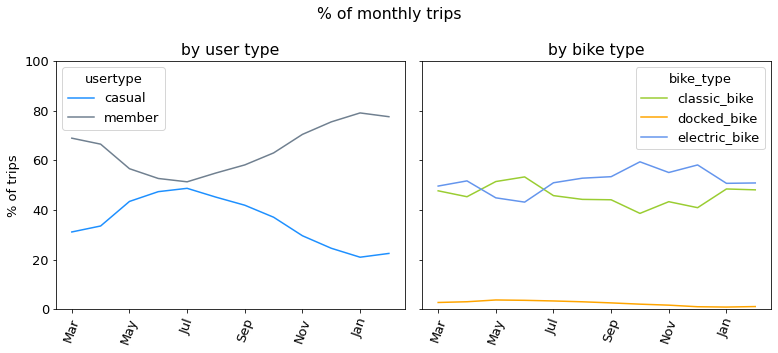

In [17]:
## plot % of total trips by month, first by user type and then by bike type

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(11)
fig.suptitle('% of monthly trips')

## These next lines are to calculate and plot the % of trips made by each user 
## type within each month.

# count trips by month and user type
df = (rides.groupby(['usertype', 'month'])['trip_id'].count()).reset_index()

# create a pivot table for trip count, with month for rows and user type for columns. 
df = pd.pivot_table(df, index='month', columns='usertype', values='trip_id')

# store constant to calculate % of trips made by each user type within each month
x = 100/(df.casual+df.member)

# convert into monthly percentages 
df.casual, df.member = x*df.casual, x*df.member

# plot
df.plot(ax = ax[0], color=user_palette)

## These next lines calculate and plot the % of trips made with each bike 
## type within each month.

# count trips by month and bike type
bike_type = rides.groupby(['bike_type','month'])['trip_id'].count().reset_index()

# create pivot table for trip count, with month for rows and bike type for columns
bike_type = pd.pivot_table(bike_type, values='trip_id', index='month', columns='bike_type')

# store constant to calculate % of trips made wuth each bike type within each month
x = 100/bike_type.sum(axis=1)

# convert into monthly percentages 
bike_type.classic_bike, bike_type.docked_bike = x*bike_type.classic_bike, x*bike_type.docked_bike
bike_type.electric_bike = x*bike_type.electric_bike

# plot
bike_type.plot(ax = ax[1], color=bike_palette)

## plot formatting
ax[0].set_ylabel('% of trips')
ax[0].set_ylim(0, 100)
ax[0].set_title('by user type')
ax[0].tick_params('x', rotation=70)
ax[0].set_xlabel('')

ax[1].set_title('by bike type')
ax[1].tick_params('x', rotation=70)
ax[1].set_xlabel('')

plt.tight_layout()

Below we can see the % of all year's trips each type of user made each month, for every type of bike. The overall trend for both types of users is the same but they have an important difference. For members classic bikes are the most popular in the spring; after July they start decreasing in popularity while electric bikes rise through the ranks, becoming the more popular ones from October to January. On the other hand, for casual users classic bikes are never on 1st place, they are even with electric ones on may and June, but other than that electric bikes win by a wide margin, especially from July to November. 

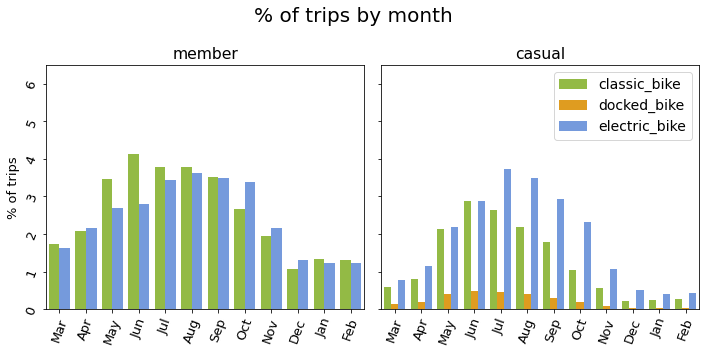

In [18]:
## Plot % of all trips made each month by bike type for each user type.

fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("% of trips by month", size=20)


for i, user in enumerate(rides["usertype"].unique()):

    # calculate % of trips made each month by bike type for a single user type.
    df = (
        rides[rides["usertype"] == user]
        .groupby(["bike_type", "month"])["trip_id"]
        .count()
        / len(rides)
        * 100
    ).reset_index()

    # plot
    sns.barplot(
        ax=ax[i], data=df, x="month", y="trip_id", hue="bike_type", palette=bike_palette
    )

    # plot formatting
    ax[i].set_title(user)
    ax[i].set_xlabel("")
    ax[i].legend().remove()
    ax[i].tick_params(rotation=70)

# more plot formatting
ax[0].set_ylim(0, 6.5)
ax[0].set_ylabel("% of trips")
ax[1].set_ylabel("")
ax[1].legend(prop={"size": 14})


plt.tight_layout();

<Figure size 720x576 with 0 Axes>

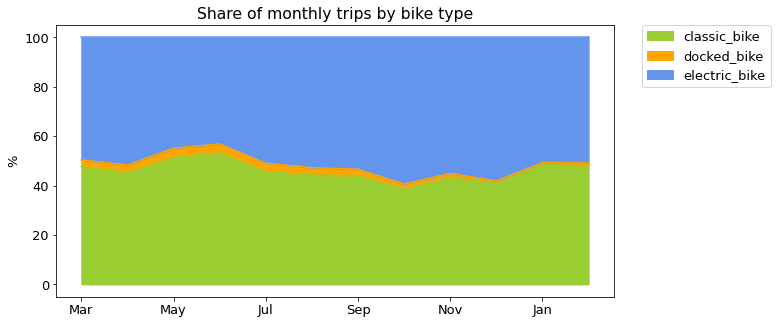

In [19]:
## Plot % of total by bike type for each month

# count rides by month and bike type
df = rides.groupby(["bike_type", "month"])["trip_id"].count().reset_index()

# pivot trip count with month as rows and bike type as columns
df = pd.pivot_table(df, values="trip_id", index="month", columns="bike_type")

# store constant to convert to % of total for each month
x = 100 / df.sum(axis=1)

# convert to % of total within each month
df.classic_bike, df.docked_bike, df.electric_bike = (
    x * df.classic_bike,
    x * df.docked_bike,
    x * df.electric_bike,
)

# plot
plt.figure(figsize=(10, 8))
df.plot(kind="area", color=bike_palette)
plt.title("Share of monthly trips by bike type")
plt.xlabel("")
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0);

To test the previous hypothesis that users go on longer rides when it is warmer outside, the table below shows the average duration for trips per month. We see that, indeed, **in warmer months the trip duration is highest**, while it is **lowest on colder months**. This applies both to casual users and to members as well, although again we see that the curve for casuals is a lot steeper.

This effect could happen either because on warms months trips are longer in distance, because users ride more slowly, or a combination of both.

The second plot shows that both types of users do in fact go on longer distance rides when it is warmer. More importantly, they **both go on rides of almost the same length all year** except in march, April and to a lesser extent on may. 

But this is not the only reason why spring and summer rides last longer. The last plot shows that **casual users are consistently slower than members**, although **both of them slow down in warmer months**. This seems to further verify that casual users tend to enjoy the ride and take their time going from one place to another, while members use it more as a convenient method of transportation. All users make haste when its cold outside, though.

So the longer average duration for trips in warm seasons has two causes: 1. on those seasons trips are longer in distance, and 2. users are slower while using the bikes when its warmer. We can say it is causation in this case since speed = distance/duration, so duration = distance/speed. If distance is larger and speed is smaller the duration will be larger on both accounts. As for the cause of these effects being the weather, this is only a hypothesis. 

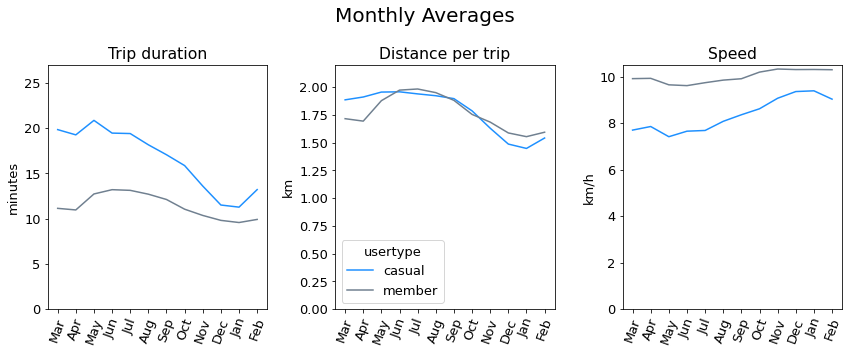

In [20]:
## Plot monthly average dynamics (duration, distance, speed) by user type

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("Monthly Averages", size=20)

# calculate mean duration, distance and speed by month and user type
minutes = rides.groupby(["usertype", "month"])["minutes"].mean().reset_index()
distance = rides.groupby(["usertype", "month"])["distance"].mean().reset_index()
speed = rides.groupby(["usertype", "month"])["speed"].mean().reset_index()

# plot
sns.lineplot(
    ax=ax[0],
    data=minutes,
    x="month",
    y="minutes",
    hue="usertype",
    palette=user_palette,
    legend=False,
)

sns.lineplot(
    ax=ax[1],
    data=distance,
    x="month",
    y="distance",
    hue="usertype",
    palette=user_palette,
)

sns.lineplot(
    ax=ax[2],
    data=speed,
    x="month",
    y="speed",
    hue="usertype",
    palette=user_palette,
    legend=False,
)

# plot formatting
ax[0].tick_params("x", labelrotation=70)
ax[1].tick_params("x", labelrotation=70)
ax[2].tick_params("x", labelrotation=70)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_title("Trip duration")
ax[1].set_title("Distance per trip")
ax[2].set_title("Speed")

ax[0].set_ylabel("minutes")
ax[1].set_ylabel("km")
ax[2].set_ylabel("km/h")

ax[0].set_ylim(0, 27)
ax[1].set_ylim(0, 2.2)
ax[2].set_ylim(0, 10.5)

plt.tight_layout()

One other factor that probably has some influence in the fact that members are faster overall is that they are very likely to be fitter from using the bikes regularly as one of their methods of transportation.

### Yearly insights <a name="yearly_ins"></a>

* There is a **high demand for electric bikes from casual users from May to October** (approx). 
* **April to November** are the **most active months** overall.
* **November to March** have a really **low rate of casual users**.
* **Casual users are slower** than members.
* Trip*distances are longer on warm seasons.
* Speed is higher in cold seasons

Put as a story, we have seen that trips follow a certain trend over the course of a year; on March there not that many daily trips, they are short in duration, made at higher speeds and mostly by members. As the spring and summer come along casual users start using the bikes more and more, users in general tend to go a little bit slower and taking slightly longer trips, which makes the time they use each bike a little bit longer. People also start using less electric bikes and more classic bikes. As the summer fades out and the cold starts to settle, casual users gradually stop using the bikes, the rides grow shorter and faster in both speed and duration, and electric bikes become the most popular once more.




## Weekly trends <a name="weekly"></a>

In this section we will now focus on weekly trends.

The first thing we notice is that on a weekly basis members and casuals display different trends. Members use the bikes mostly during weekdays, while **casuals tend to use them most on weekends**, especially on Saturdays.

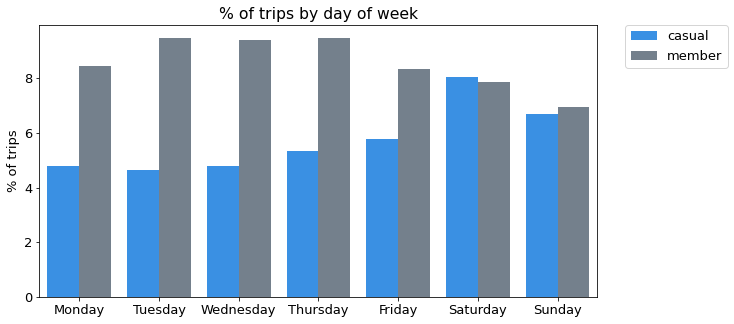

In [21]:
## plot % of all trips made by each user type each month

# calculate % of all 12 months' trips made each month by user type
df = (
    rides.groupby(["usertype", "day_of_week"])["trip_id"].count() / len(rides) * 100
).reset_index()

# plot
sns.barplot(data=df, x="day_of_week", y="trip_id", hue="usertype", palette=user_palette)

# plot formatting
plt.title("% of trips by day of week")
plt.xlabel("")
plt.ylabel("% of trips")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0);

A closer look at the distribution of trips along the week, showing the distributions for each user type by bike type, shows that the trend is the same for all bike types within each user type, although the scale at which each bike type is represented for casual users is very different since they use electric > classic > docked.

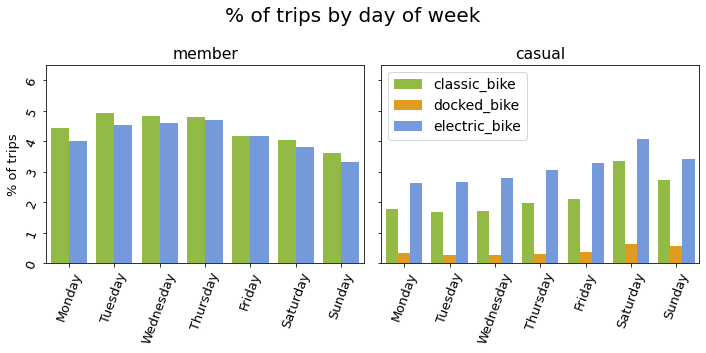

In [22]:
## Plot % of all trips made each day of the week by bike type for each user type.

fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("% of trips by day of week", size=20)

for i, user in enumerate(rides["usertype"].unique()):
    # calculate % of trips made each month by bike type for a single user type.
    df = (
        rides[rides["usertype"] == user]
        .groupby(["bike_type", "day_of_week"])["trip_id"]
        .count()
        / len(rides)
        * 100
    ).reset_index()
    
    # plot
    sns.barplot(
        ax=ax[i],
        data=df,
        x="day_of_week",
        y="trip_id",
        hue="bike_type",
        palette=bike_palette,
    )
    
    # plot formatting
    ax[i].set_title(user)
    ax[i].set_xlabel("")
    ax[i].legend().remove()
    ax[i].tick_params(rotation=70)

# more plot formatting
ax[0].set_ylim(0, 6.5)
ax[0].set_ylabel("% of trips")
ax[1].set_ylabel("")
ax[1].legend(prop={"size": 14})

plt.tight_layout();

The area chart below proves that the trends are almost exactly the same for all bike types (within each user type), since the ratios of classic, docked and electric bikes is pretty much the same throughout the week. If the trends were different the ratios of classic to electric to docked would change, and the proportions for each color shown in the plot would vary.

A close look reveals that docked bikes have a bit of a steeper curve, making their ratio higher on weekends, but the difference is so tiny that it doesn't really make a noticeable difference.

<Figure size 720x576 with 0 Axes>

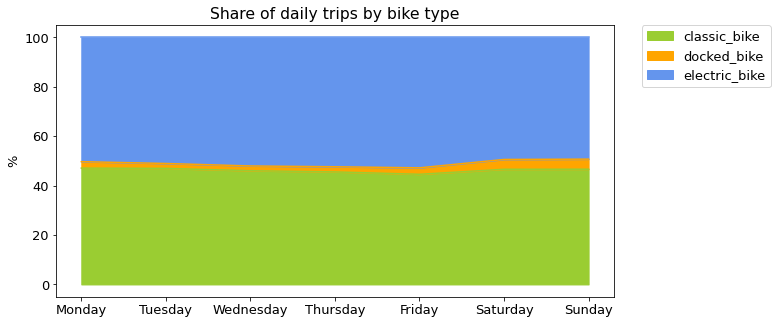

In [23]:
## Plot % of total by bike type for each month

# count rides by day of week and bike type
df = rides.groupby(["bike_type", "day_of_week"])["trip_id"].count().reset_index()

# pivot trip count with DOW as rows and bike type as columns
df = pd.pivot_table(df, values="trip_id", index="day_of_week", columns="bike_type")

# store constants to convert to % of total for each DOW
x = 100 / df.sum(axis=1)

# convert to % of total within each DOW
df.classic_bike, df.docked_bike, df.electric_bike = (
    x * df.classic_bike,
    x * df.docked_bike,
    x * df.electric_bike,
)

# plot
plt.figure(figsize=(10, 8))
df.plot(kind="area", color=bike_palette)
plt.title("Share of daily trips by bike type")
plt.xlabel("")
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0);

As for the duration, distance and speed of the trips, again we notice that member's are shorter in duration, higher in speed and almost the same in distance. 

They both display exactly the same weekly trends, though: for both types of users **rides on weekends are a little bit longer in duration and in distance, while speed goes down a little**. This is probably because people are, in general, in less of a hurry on weekends. Maybe they also go in more recreational rides on weekends or visit their friends and family, traveling greater distances than usual.

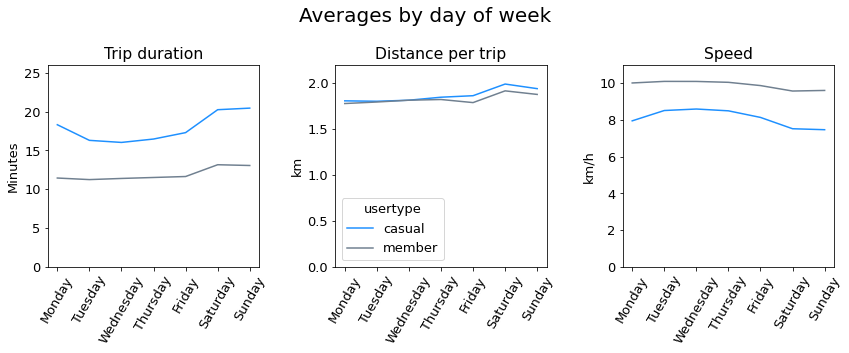

In [24]:
## Plot average dynamics (duration, distance, speed) by user type and DOW

fig, ax = plt.subplots(1, 3)
fig.suptitle("Averages by day of week", size=20)
fig.set_figwidth(12)

# calculate mean duration, distance and speed by DOW and user type
minutes = rides.groupby(["usertype", "day_of_week"])["minutes"].mean().reset_index()
speed = rides.groupby(["usertype", "day_of_week"])["speed"].mean().reset_index()
distance = rides.groupby(["usertype", "day_of_week"])["distance"].mean().reset_index()

# plot
sns.lineplot(
    ax=ax[0],
    data=minutes,
    x="day_of_week",
    y="minutes",
    hue="usertype",
    palette=user_palette,
    legend=False,
)
sns.lineplot(
    ax=ax[1],
    data=distance,
    x="day_of_week",
    y="distance",
    hue="usertype",
    palette=user_palette,
)
sns.lineplot(
    ax=ax[2],
    data=speed,
    x="day_of_week",
    y="speed",
    hue="usertype",
    palette=user_palette,
    legend=False,
)

# plot formatting
ax[0].tick_params("x", labelrotation=60)
ax[1].tick_params("x", labelrotation=60)
ax[2].tick_params("x", labelrotation=60)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_ylabel("Minutes")
ax[1].set_ylabel("km")
ax[2].set_ylabel("km/h")

ax[0].set_title("Trip duration")
ax[1].set_title("Distance per trip")
ax[2].set_title("Speed")

ax[0].set_ylim(0, 26)
ax[1].set_ylim(0, 2.2)
ax[2].set_ylim(0, 11)

plt.tight_layout()

### Weekly Insights <a name="weekly_ins"></a>
* **Casual users use bikes more often on weekends.**
* **Rides are slower, last longer and go further on weekends.**
* Members use bikes more often on weekdays.
* Trends are the same for all bike types for each user type.


## Daily trends <a name="daily"></a>

It is time to look at how rides change during the day, on an hourly basis.

In the next barplot the green shaded bars represent the total number of trips started within each of the 24 hours, that is the sum of the casual and member trips. 

We see that the daily pattern is very similar for both types of users, although the peaks around 8am and 5pm are a lot more noticeable for members, very likely because of commutes to and from work. Very few rides happen after 11pm and before 6 am, and the **busiest hours are 4pm to 7pm**.

An interesting thing is that from 11pm to 4am there are more rides made by casual users than by members. At all other times the number of rides made by members is considerably higher than that of casual users.

Text(0.5, 1.0, 'Volume of trips by time of day')

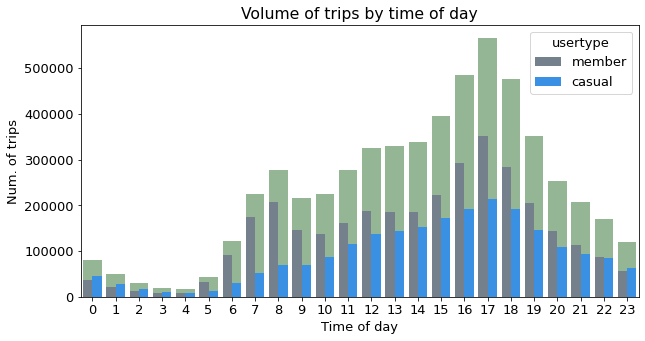

In [25]:
## Plot histogram for rides by time of day, total and by user type.

# plot histogram for all rides
sns.countplot(data=rides, x="time_of_day", color="darkseagreen")

# plot histogram by user type
sns.countplot(data=rides, x="time_of_day", hue="usertype", palette=user_palette)

# plot formatting
plt.xlabel("Time of day")
plt.ylabel("Num. of trips")
plt.title("Volume of trips by time of day")

the next plots show how the duration of the trips, their distance and speed change throughout the day.

The duration of the trips is really low in the early morning, from 5am to 7am there is a minimum of 10-12 minute trips that coincides with a speed peak of 10 to 12 km/h. The slowest and most time consuming trips, on the other hand, happen between 9am and 6pm. This could have something to do with the higher traffic of all kinds (cars, bikes and pedestrians as well) at those hours. 

The distances are all over the place during the day, although there is a clear drop in distance traveled around 9pm and a small peak at 4am. Why this is, I don't have a clue.

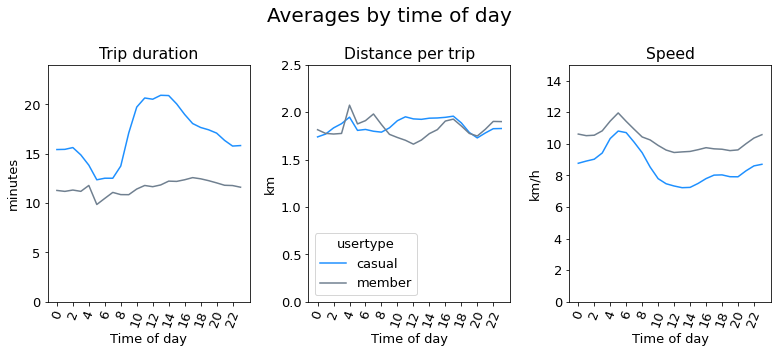

In [26]:
## Plot average dynamics (duration, distance, speed) by user type and time of day (TOD)

fig, ax = plt.subplots(1, 3)

fig.suptitle("Averages by time of day", size=20)
fig.set_figwidth(11)
fig.set_figheight(5)

# calculate mean duration, distance and speed by TOD and user type
minutes = rides.groupby(["usertype", "time_of_day"])["minutes"].mean().reset_index()
speed = rides.groupby(["usertype", "time_of_day"])["speed"].mean().reset_index()
distance = rides.groupby(["usertype", "time_of_day"])["distance"].mean().reset_index()

# plot
sns.lineplot(
    ax=ax[0],
    data=minutes,
    x="time_of_day",
    y="minutes",
    hue="usertype",
    palette=user_palette,
    legend=False,
)
sns.lineplot(
    ax=ax[1],
    data=distance,
    x="time_of_day",
    y="distance",
    hue="usertype",
    palette=user_palette,
)
sns.lineplot(
    ax=ax[2],
    data=speed,
    x="time_of_day",
    y="speed",
    hue="usertype",
    palette=user_palette,
    legend=False,
)

# plot formatting
ax[0].tick_params("x", labelrotation=70)
ax[1].tick_params("x", labelrotation=70)
ax[2].tick_params("x", labelrotation=70)

ax[0].set_ylabel("minutes")
ax[1].set_ylabel("km")
ax[2].set_ylabel("km/h")

ax[0].set_xlabel("Time of day")
ax[1].set_xlabel("Time of day")
ax[2].set_xlabel("Time of day")

ax[0].set_ylim(0, 24)
ax[1].set_ylim(0, 2.5)
ax[2].set_ylim(0, 15)

ax[0].set_title("Trip duration")
ax[1].set_title("Distance per trip")
ax[2].set_title("Speed")

ax[0].set_xticks(range(0, 23, 2))
ax[1].set_xticks(range(0, 23, 2))
ax[2].set_xticks(range(0, 23, 2))

plt.tight_layout()

The following plots show the percentage of all trips made within each hour, for each bike and user type. At a first glance the behavior for members seems more complex, having that second peak around 8am, most likely caused by people commuting to work. After a closer look we see the casuals curve has this same behavior, although it is a lot less pronounced on the 8am peak. 

Other than that, the ratios of classic to docked to electric bikes is pretty much the same for both kinds of users throughout the day, except for the night time, from 9pm to 4am or so, when electric bikes take some of the share from classic bikes.

This partially explains why the speeds are faster during the night, since that is when - in proportion to all bikes made within the hour - most bikes are made with electric bikes. The speed spike at 6am shown above, though, falls outside this range, which is interesting.


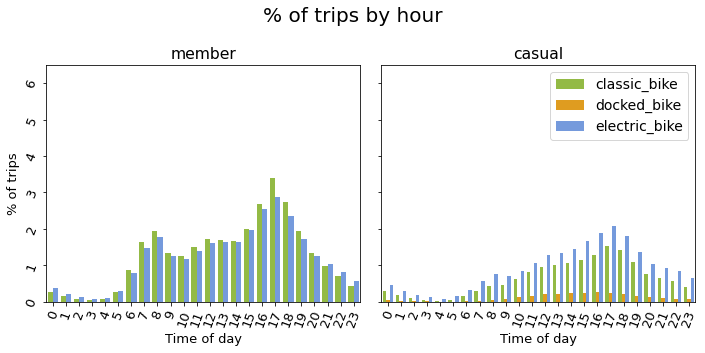

In [27]:
## Plot % of all trips made by time of day and bike type for each user type.

fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("% of trips by hour", size=20)

for i, user in enumerate(rides["usertype"].unique()):
    # calculate % of trips made each hour by bike type for a single user type.
    df = (
        rides[rides["usertype"] == user]
        .groupby(["bike_type", "time_of_day"])["trip_id"]
        .count()
        / len(rides)
        * 100
    ).reset_index()
    
    # plot
    sns.barplot(
        ax=ax[i],
        data=df,
        x="time_of_day",
        y="trip_id",
        hue="bike_type",
        palette=bike_palette,
    )
    
    # plot formatting
    ax[i].set_title(user)
    ax[i].set_xlabel("")
    ax[i].legend().remove()
    ax[i].tick_params(rotation=70)

# more plot formatting
ax[0].set_ylim(0, 6.5)
ax[0].set_ylabel("% of trips")
ax[0].set_xlabel("Time of day")
ax[1].set_ylabel("")
ax[1].set_xlabel("Time of day")
ax[1].legend(prop={"size": 14})

plt.tight_layout();

<Figure size 720x576 with 0 Axes>

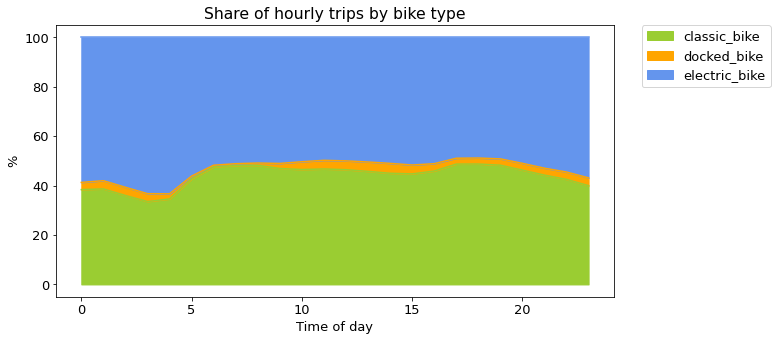

In [28]:
## Plot % of total by bike type for each hour

# count rides by TOD and bike type
df = rides.groupby(["bike_type", "time_of_day"])["trip_id"].count().reset_index()

# pivot trip count with TOD as rows and bike type as columns
df = pd.pivot_table(df, values="trip_id", index="time_of_day", columns="bike_type")

# store constants to convert to % of total for each TOD
x = 100 / df.sum(axis=1)

# convert to % of total within each TOD
df.classic_bike, df.docked_bike, df.electric_bike = (
    x * df.classic_bike,
    x * df.docked_bike,
    x * df.electric_bike,
)

# plot
plt.figure(figsize=(10, 8))
df.plot(kind="area", color=bike_palette)
plt.title("Share of hourly trips by bike type")
plt.xlabel("")
plt.ylabel("%")
plt.xlabel("Time of day")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0);

### Daily Insights <a name="daily_ins"></a>

* There are **two daily spikes, around 8am and 5pm**, most likely related to commutes to and from work, respectively.
* **Most rides happen between 10am and 9pm**
* Electric bikes are more popular at night.
* Casual users are slowest around midday.

## Geographical trends <a name="geo"></a>

Finally we will look at some of the geographical trends. 

The following funnel plot shows the most popular stations among casual users. The blue bars shows how many trips made by casual users  started/ended at that station and the gray bars show the same thing but for members. It is ordered by decreasing number of round trips by casual users. From it is evident that there are some stations which are a lot more popular among casual users, as compared to members. Many of these **stations are located near museums, parks, and other recreational or tourist-oriented establishments**, which partially explains why most of the rides started or ended there are made by casual users, who in many occasions are tourists.

So, for example, to mention a few stations, Streeter Dr & Grand Ave, the most popular station overall but especially among casual users, is located  within Addams memorial park, next to the navy pier, the children's museum, and many other attractions. Other stations that are mostly frequented by casual users are the Millenium Park, Shedd Aquarium, the Theater on the Lake, the Addler Planetarium, Dusable Harbor and DuSable Lake shore Dr & Monroe St., which is at the entrance to the yatch club. 

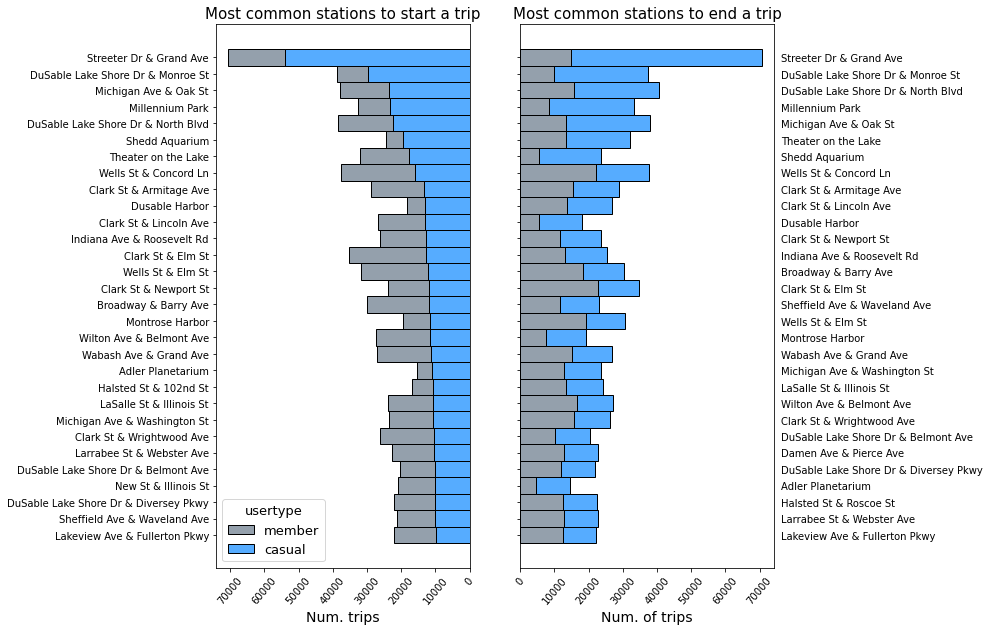

In [29]:
## Funnel chart for most common stations to start and end a trip among
## casual users, showing num of trips by user type.

fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)

## The next lines find the stations with most trips started from by casual users

# keep only casual's data
df = rides[rides["usertype"] == "casual"]

# we count the trips started at each station, then sort descending and
# keep only the highest 30. The 1st row was excluded since it corresponds
# to 'No station', which is electric bikes left at random places.
most_used = df.groupby("start_name")["trip_id"].count().sort_values(ascending=False)
most_used = (
    most_used.reset_index().iloc[1:31].rename(columns={"trip_id": "start_count"})
)

# we add a row with the trip count per station for the 30 stations found
# above, the inner join will only keep records for these stations.
most_started_at = rides.merge(
    most_used, how="inner", left_on="start_name", right_on="start_name"
)

# again we sort the values so that we get the characteristic funnel shape
most_started_at = most_started_at[
    ["start_name", "trip_id", "usertype", "start_count"]
].sort_values("start_count", ascending=False)

# change the order of the user types so that the casuals bin will be in the
# inner part of the graph.
most_started_at["usertype"] = most_started_at["usertype"].astype(
    pd.api.types.CategoricalDtype(categories=["member", "casual"], ordered=True)
)

# plot
sns.histplot(
    ax=ax[0],
    data=most_started_at,
    y="start_name",
    hue="usertype",
    multiple="stack",
    palette=user_palette,
)

# plot formatting
ax[0].set_ylabel("")
ax[0].set_xlabel("Num. trips", size=14)
ax[0].set_title("Most common stations to start a trip", size=15)
ax[0].tick_params(labelsize=10)
ax[0].tick_params("x", rotation=50)
ax[0].invert_xaxis()


## Repeat the process for stations with most trips ended at

most_used = df.groupby("end_name")["trip_id"].count().sort_values(ascending=False)
most_used = most_used.reset_index().iloc[1:31].rename(columns={"trip_id": "end_count"})

most_ended_at = rides.merge(
    most_used, how="inner", left_on="end_name", right_on="end_name"
)

most_ended_at = most_ended_at[
    ["end_name", "trip_id", "usertype", "end_count"]
].sort_values("end_count", ascending=False)


sns.histplot(
    ax=ax[1],
    data=most_ended_at,
    y="end_name",
    hue="usertype",
    multiple="stack",
    palette=user_palette,
    legend=False,
)

ax[1].set_ylabel("")
ax[1].set_xlabel("Num. of trips", size=14)
ax[1].set_title("Most common stations to end a trip", size=15)
ax[1].tick_params(labelsize=10)
ax[1].tick_params("x", rotation=50)

# Change ticks from left to right so they show outside the funnel
ax[1].yaxis.set_tick_params(labelright=True)
ax[1].yaxis.set_tick_params(labelleft=False);

Earlier, from the distribution of distances traveled per trip, we hypothesized that casual users made a lot of round trips, that is, trips starting and ending at the same station, making their most common distance to be 0. The following shows the 25 most common stations where round trips happen. Many of the stations above are here again, and it is clear that **most of the round trips made at these stations are made by casual users**.

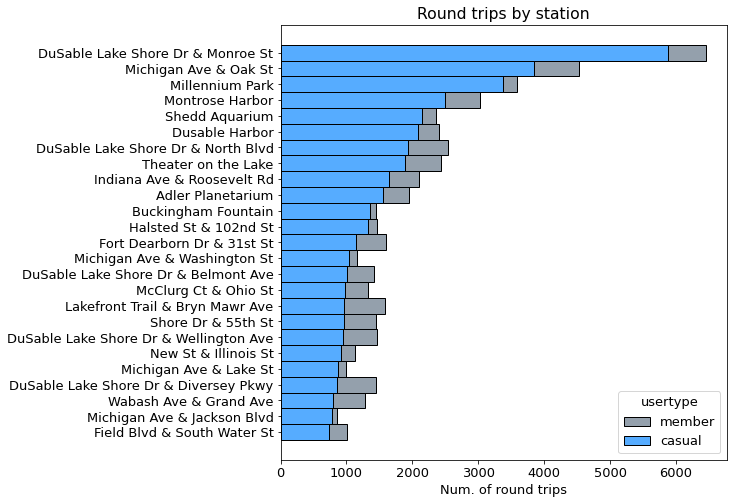

In [30]:
## Countplot for station where most round trips where made by casual users

# filter for round trips only
round_trips1 = rides[rides["start_name"] == rides["end_name"]][
    ["trip_id", "usertype", "start_name"]
]
# count number of round trips by station and usertype and select the top 25 for casual users only
stations = (
    round_trips1.groupby(["usertype", "start_name"])["trip_id"]
    .count()
    .reset_index()
    .sort_values(["usertype", "trip_id"], ascending=[True, False])
    .iloc[2:27]["start_name"]
    .unique()
)
# filter for only round trips on the top 25 stations
round_trips = round_trips1[round_trips1["start_name"].isin(stations)]

# create order for station names so that the plot is decreasing on the count of casuals' round trips
round_trips.loc[:, "start_name"] = round_trips["start_name"].astype(
    pd.api.types.CategoricalDtype(categories=stations, ordered=True)
)

# sort by station name according to the order imposed above
round_trips.sort_values("start_name", inplace=True)

# change order of user type so that casuals' bins are to the left
round_trips.loc[:, "usertype"] = round_trips["usertype"].astype(
    pd.api.types.CategoricalDtype(categories=["member", "casual"], ordered=True)
)

# plot
plt.figure(figsize=(8, 8))
sns.histplot(
    data=round_trips,
    y="start_name",
    hue="usertype",
    palette=user_palette,
    multiple="stack",
)

# plot formatting
plt.ylabel("")
plt.xlabel("Num. of round trips")
plt.title("Round trips by station");

The maps below show that **the most busy region for both start and end stations is in the downtown Chicago area**, and in general all areas near shore, on the East side of the city. All areas seem to be almost equally frequented by casual users and members.

It is worth noting that, while the start location map has a more or less well defined border, determined by the locations of the stations, the map for the end location doesn't have a well defined border on the West side. There are plenty of trips that apparently ended in places where no trips start at; most of these trips seem to have been made by casual users. This means that casual users like going out West, out of the official area covered by the stations.

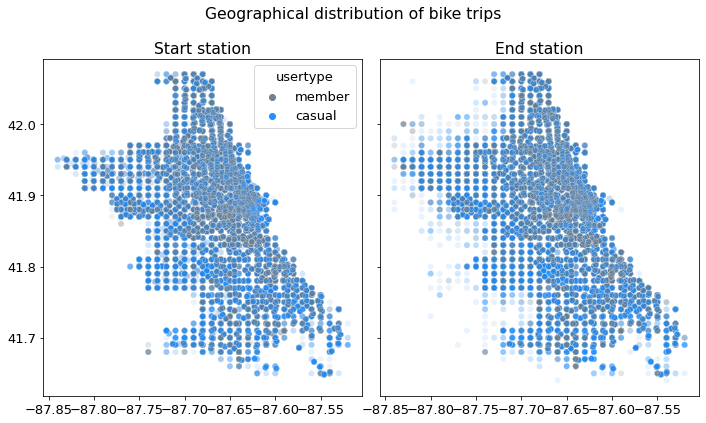

In [31]:
## 'map' of start and end stations

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.suptitle("Geographical distribution of bike trips")

# plot start coords
sns.scatterplot(
    ax=ax[0],
    data=rides.sample(frac=0.5),
    y="start_lat",
    x="start_lng",
    alpha=0.1,
    hue="usertype",
    palette=user_palette,
)

# plot end coords
sns.scatterplot(
    ax=ax[1],
    data=rides.sample(frac=0.5),
    y="end_lat",
    x="end_lng",
    alpha=0.1,
    hue="usertype",
    palette=user_palette,
    legend=False,
)

# plot formatting
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("Start station")

ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_title("End station")

plt.tight_layout();

The next map shows the end location for a sample of the data. Rides made with classic and docked bikes are contained within the most urban areas of the city, which is closer to the coast. Trips that go further West are almost always made with electric bikes, which correspond to some of the outliers noticed above. From this we can deduce that **many casual users take out electric bikes to go West, ending their trips at locations where there are no stations**. According to the company's website electric bikes can be left locked on poles, regular bike racks, etc, so the bikes can be recovered by the company and taken back into the city, leaving us with many trips ending in those areas but only a few starting there.

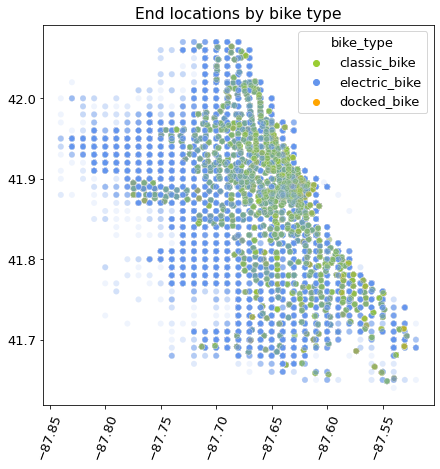

In [32]:
## map of end stations by bike type

plt.figure(figsize=(7, 7))

# plot coords by bike type
sns.scatterplot(
    data=rides.sample(frac=0.5),
    y="end_lat",
    x="end_lng",
    alpha=0.1,
    hue="bike_type",
    palette=bike_palette,
)

# plot formatting
plt.title("End locations by bike type")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=70);

### Geographical Insights <a name="geo_ins"></a>

* Stations most used by casual users are **near touristic areas and establishments**.
* **Casual users** tend to make **round trips** a lot more than members.
* There is a fair amount of **trips ending in the North-West region** of the city, where there are **no stations**
    to start trips at.
* Most trips ending West are made by casual users on electric bikes.

# Key Insights <a name="summary"></a>

Throughout this analysis there were a few differences that popped out between members and casual users. Here is a list of the most relevant qualities that characterize casual users:

* They prefer electric bikes, making **54.7% of the last 12 months trips with electric bikes**, 38.4% with classic ones and only 6.90% with docked bikes. 
* They tend to go on **more lasting trips**, with an average of 18 minutes compared to the 12 minutes of members. From March to July trips are even longer, going as high as 22 minute per trip, on average. During this period the average distance per trips grows larger too.
* **81.09% of their trips happen between May and October** (inclusive), with only 18.91% happening in the other half of the year.
* Many of the **most frequented stations** by casual users are **located next to museums, piers, parks and other touristic attractions**. Most of these stations are not so frequented by members.
* There are **more rides** made by casual users **on weekends** than on weekdays, in contrast to members who are the other way around.
* Casual users use the bikes to make round trips more often than members, ending the ride at the same station where it began. **6.13% of casual user's rides are round trips**, compared to 2.13% of member's rides. Most of these rides start and end in the same touristic spots mentioned above. 
* The busiest time of day for casual users is 5pm, same as for members. The demand for bikes from all users peaks from 4 to 7pm, making it the time most likely to leave users without available bikes. This is also when trips are longest in duration. 

# Recommendations <a name="recommendations"></a>

1. **Launch a semi-annual membership**. Casual users make more than 80% of their trips within only 6 months, and barely use them the other half of the year. Paying only for the seasons they might be tempted to use the bikes could be a good incentive for them to purchase a membership. This could push some of the current members out of their current plans, though, so the pricing for the different kinds of memberships should be thought of carefully to keep as many current members in their annual membership.
2. **Launch a spring or summer sale** a few months in advance, for any people expecting to travel into the city and planning their future vacation, as well as for people living within the city who are just waiting for the weather to be better.
3. **Launch a marketing campaign showcasing customers in iconic places** within the city using the bikes, showing all the most important landmarks, museums, parks, etc, can be easily reached using our bikes.
4. **Augment ride time/reduce extra time cost**. Casual users tend to go on longer rides; if the bikes are charged by the minute after a certain amount of time is reached in a single ride (as currently is), casual users wont commit since that system doesn't fit their needs. Pushing that free time a little bit upwards and/or lowering the price each minute is charged for after that could help some of those casual users decide to go for the membership after all. This could even be compensated by rising the annual fee at the same time, although not by a large amount since members who take short and efficient trips could reconsider their subscription.  
5. **Change the rate for weekend rides**. The most popular days for casual users to go on a bike ride are weekends, which are the least popular days for members. Having the possibility to ride more at ease during those days could incentivize casual users to use the bikes more and maybe even consider purchasing a membership.
6. **Install more stations to the West**, specifically in the North-West regions. There seems to be considerable interest in those areas, judging by the many rides going there made by casual users on electric bikes. 